In [1]:
def zplane(z, p):
    plt.scatter(p.real, p.imag)
    plt.scatter(z.real, z.imag)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.gca().add_patch(plt.Circle((0, 0), radius=1, color='black', fill=False))
    plt.show()

    zer = np.zeros(40)
    zer[0] = 1

    y = signal.lfilter(b, a, zer)
    plt.stem(y)

def afc_pfc(w, h):
    plt.plot(w, abs(h))
    plt.xlabel('Frequency [radians / sample]')
    plt.ylabel('Amplitude')
    plt.show()

    plt.plot(w, np.angle(h))
    plt.xlabel('Frequency [radians / sample]')
    plt.ylabel('Phase')
    plt.show()

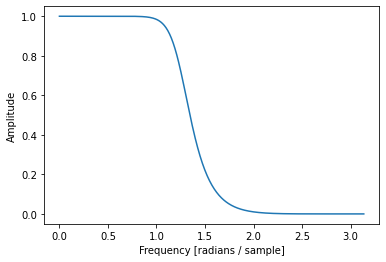

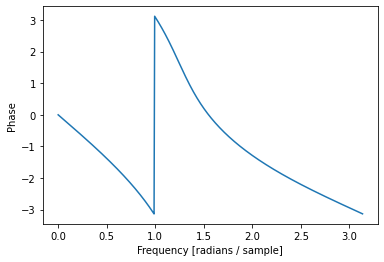

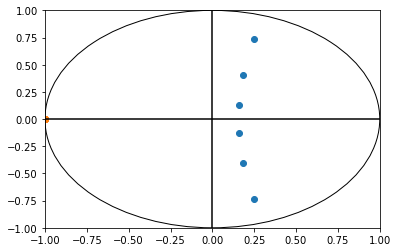

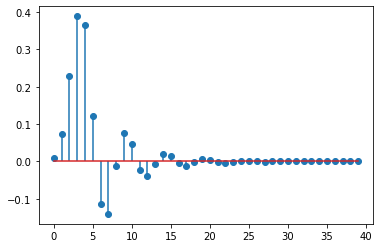

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.butter(N, Fc/(Fs/2))

w, h = signal.freqz(b, a)
afc_pfc(w, h)

z, p, k = signal.butter(N, Fc/(Fs/2), output='zpk')
zplane(z, p)

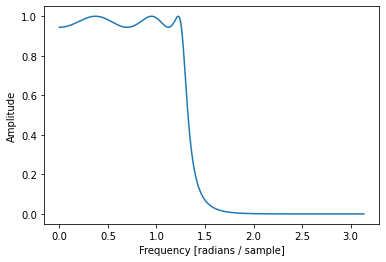

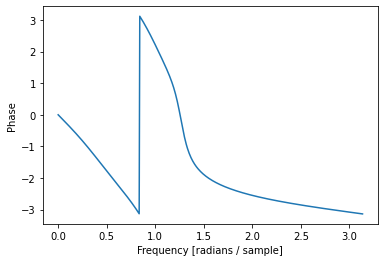

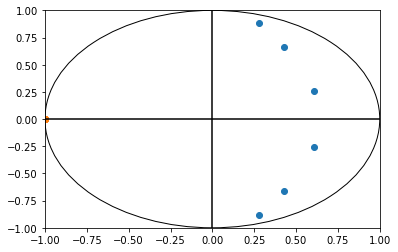

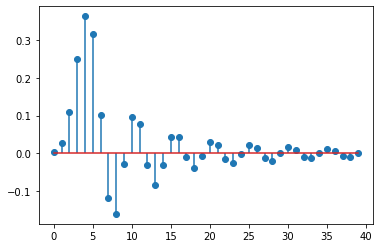

In [4]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.cheby1(N, 0.5, Fc/(Fs/2))

w, h = signal.freqz(b, a)
afc_pfc(w, h)

z, p, k = signal.cheby1(N, 0.5, Fc/(Fs/2), output='zpk')
zplane(z, p)

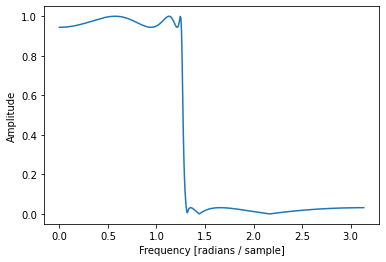

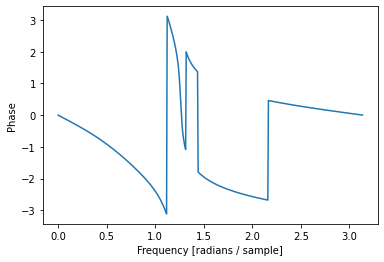

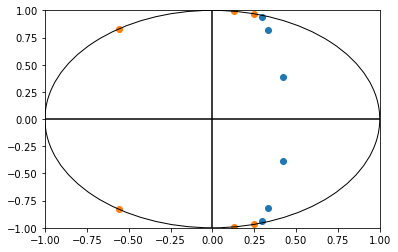

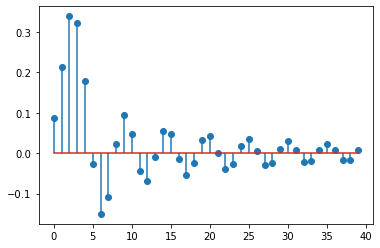

In [5]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.ellip(N, 0.5, 30, Fc/(Fs/2))

w, h = signal.freqz(b, a)
afc_pfc(w, h)

z, p, k = signal.ellip(N, 0.5, 30,  Fc/(Fs/2), output='zpk')
zplane(z, p)

In [6]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Wp = 0.28
Ws = 0.32
gpass = 0.1
gstop = 30

N1 = signal.buttord(Wp, Ws, gpass, gstop)
N2 = signal.cheb1ord(Wp, Ws, gpass, gstop)
N3 = signal.cheb2ord(Wp, Ws, gpass, gstop)
N4 = signal.ellipord(Wp, Ws, gpass, gstop)

print(N1[0], N2[0], N3[0], N4[0])

35 11 11 6


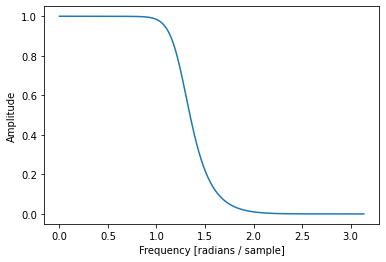

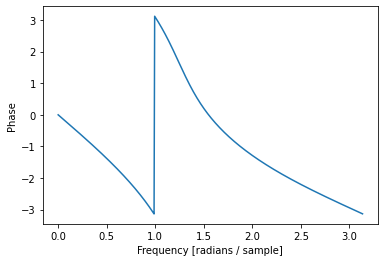

In [7]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.butter(N, Fc/(Fs/2))

b = np.floor(b*10000)
b = b/10000
a = np.floor(a*10000)
a = a/10000

w, h = signal.freqz(b, a)
afc_pfc(w,h)


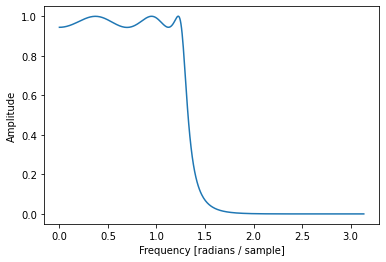

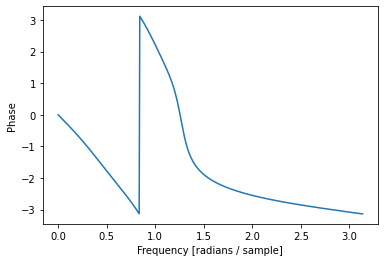

In [8]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.cheby1(N, 0.5, Fc/(Fs/2))

b = np.floor(b*10000)
b = b/10000
a = np.floor(a*10000)
a = a/10000


w, h = signal.freqz(b, a)
afc_pfc(w,h)

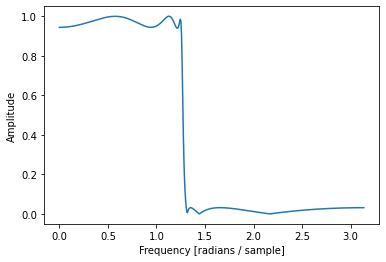

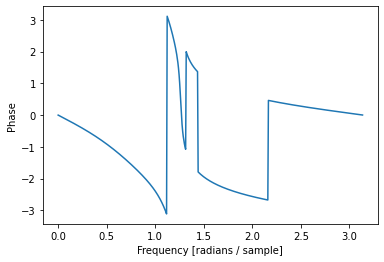

In [9]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.ellip(N, 0.5, 30, Fc/(Fs/2))

b = np.floor(b*10000)
b = b/10000
a = np.floor(a*10000)
a = a/10000

w, h = signal.freqz(b, a)
afc_pfc(w,h)

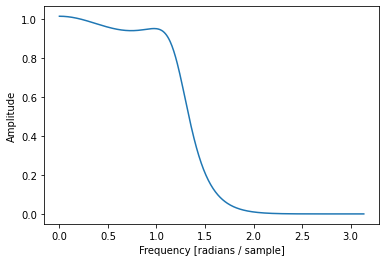

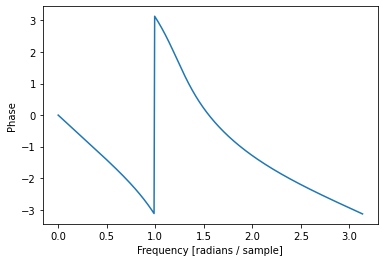

In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.butter(N, Fc/(Fs/2))

b = np.floor(b*100)
b = b/100
a = np.floor(a*100)
a = a/100

w, h = signal.freqz(b, a)
afc_pfc(w,h)

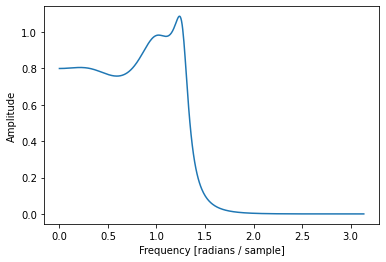

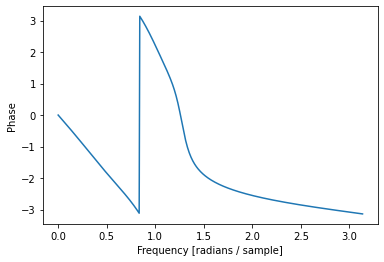

In [11]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.cheby1(N, 0.5, Fc/(Fs/2))

b = np.floor(b*100)
b = b/100
a = np.floor(a*100)
a = a/100

w, h = signal.freqz(b, a)
afc_pfc(w,h)

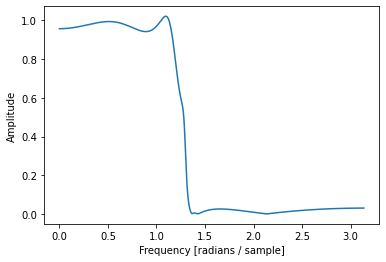

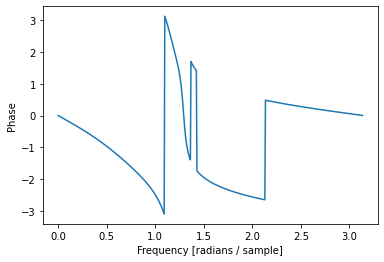

In [12]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N = 6
Fs = 2000
Fc = 400

b, a = signal.ellip(N, 0.5, 30, Fc/(Fs/2))

b = np.floor(b*100)
b = b/100
a = np.floor(a*100)
a = a/100

w, h = signal.freqz(b, a)
afc_pfc(w,h)

In [13]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


def impz(b, a, N):
    zer = np.zeros(N)
    zer[0] = 1

    y = signal.lfilter(b, a, zer)
    plt.plot(y, 'ro-')

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.show()


def zplane(b, a):
    z = np.polynomial.polynomial.polyroots(b)
    p = np.polynomial.polynomial.polyroots(a)

    plt.scatter(p.real, p.imag, marker='x')
    plt.scatter(z.real, z.imag, marker='o')

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.gca().add_patch(plt.Circle((0, 0), radius=1, color='black', fill=False))
    plt.show()

def std_wind(h, w, L):
    IdealW = np.arange(0, 1, 1/L)
    IdealH = np.zeros(L)
    IdealH[0 : int(w0 * L)] = 1

    wi, H = signal.freqz(h, 1, L)
    y = abs(H)

    std = np.sqrt( np.mean((y - IdealH) ** 2) )
    return std

def ideal_afc(h, w, L):
    IdealW = np.arange(0, 1, 1/L)
    IdealH = np.zeros(L)
    IdealH[0 : int(w0 * L)] = 1
    plt.plot(IdealW, IdealH, 'b--')

def afc(h, w, L):
    IdealH = np.zeros(L)
    IdealH[0 : int(w0 * L)] = 1

    wi, H = signal.freqz(h, 1, L)
    y = abs(H)
    plt.plot(wi/np.pi, y, 'k')
    plt.show()
    plt.plot(wi/np.pi, 20*np.log10(y), 'k')
    plt.show()

    std = np.sqrt( np.mean((y - IdealH) ** 2) )
    print(f"std = {std}")

def pfc(h, w, L):
    wi, H = signal.freqz(h, 1, L)
    plt.plot(wi/np.pi, np.angle(H))
    plt.plot(wi/np.pi, np.unwrap(np.angle(H)))
    plt.show()

def build_all(h, w):
    h2 = np.multiply(h, np.transpose(w))
    L = 1024

    ideal_afc(h2, w, L)
    afc(h2, w, L)
    pfc(h2, w, L)
    impz(h2, 1, N)
    zplane(h2, 1)

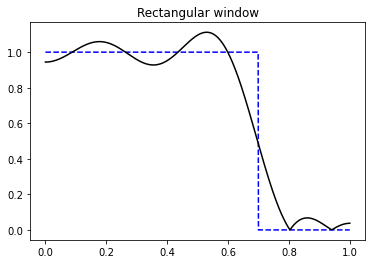

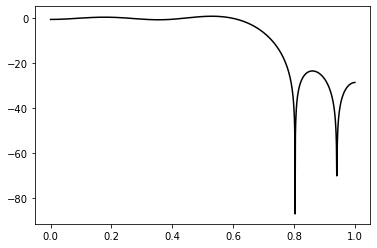

std = 0.12987438997214262


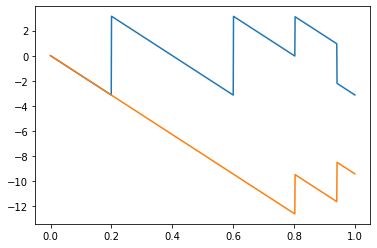

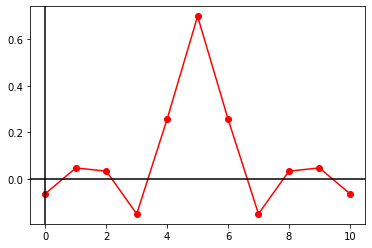

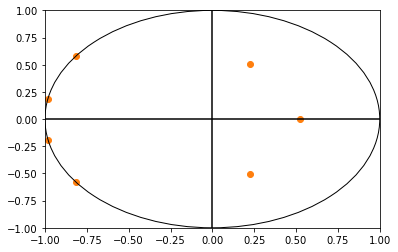

In [14]:
N = 11
w0 = 0.7
M = (N - 1) / 2
n = np.arange(np.floor(-M), np.floor(M) + 1)
h = w0 * np.sinc(w0 * n)


w = signal.windows.boxcar(N)
plt.title('Rectangular window')
build_all(h, w)

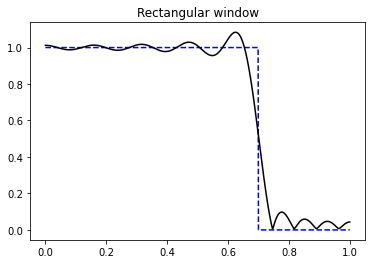

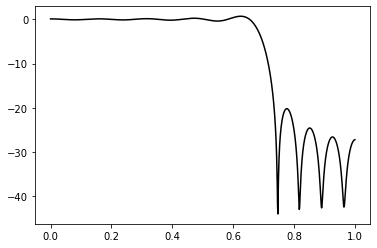

std = 0.08754297634275393


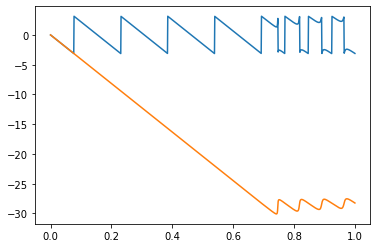

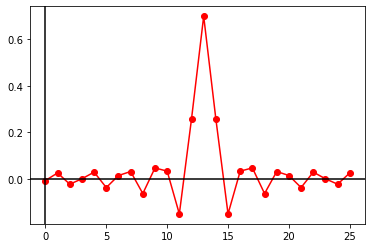

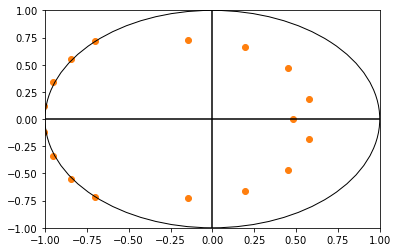

In [15]:
N = 26
w0 = 0.7
M = (N-1) / 2
n = np.arange(np.floor(-M), np.floor(M) + 1)
h = w0 * np.sinc(w0 * n)


w = signal.windows.boxcar(N)
plt.title('Rectangular window')
build_all(h, w)

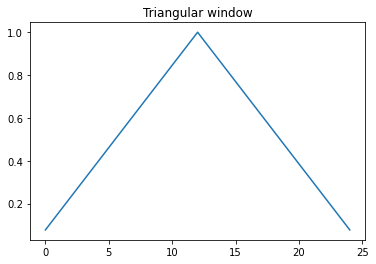

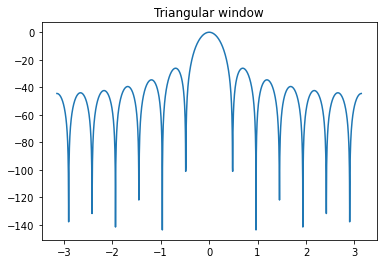

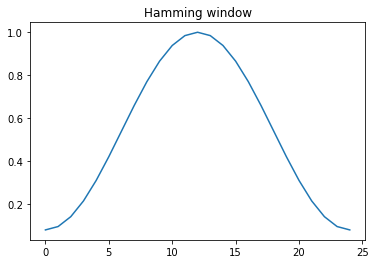

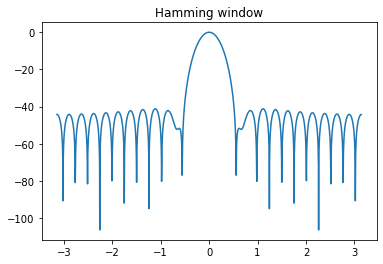

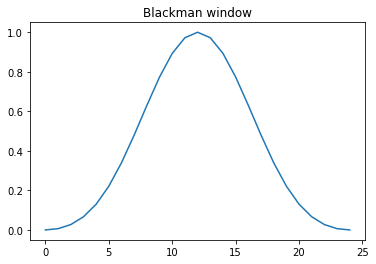

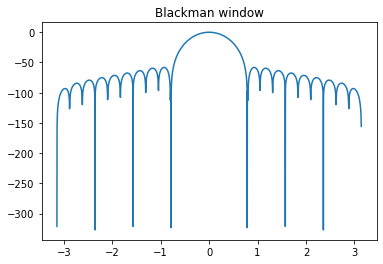

In [16]:
from scipy.fft import fft, fftshift
N = 25
w = signal.windows.triang(N)
plt.plot(w)
plt.title("Triangular window")
plt.show()

A = fft(w, 2048) / (len(w)/2.0)
freq = np.linspace(-np.pi, np.pi, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.title("Triangular window")
plt.show()

w = signal.windows.hamming(N)
plt.plot(w)
plt.title("Hamming window")
plt.show()

A = fft(w, 2048) / (len(w)/2.0)
freq = np.linspace(-np.pi, np.pi, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.title("Hamming window")
plt.show()

w = signal.windows.blackman(N)
plt.plot(w)
plt.title("Blackman window")
plt.show()

A = fft(w, 2048) / (len(w)/2.0)
freq = np.linspace(-np.pi, np.pi, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.title("Blackman window")
plt.show()

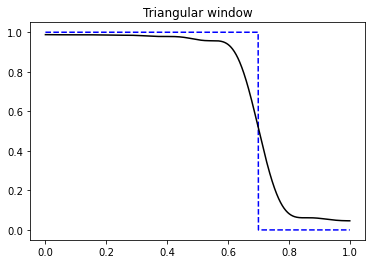

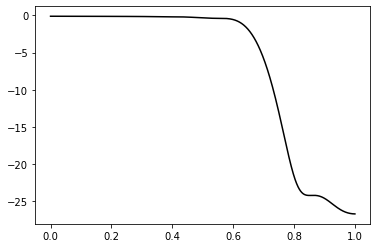

std = 0.12489823237189321


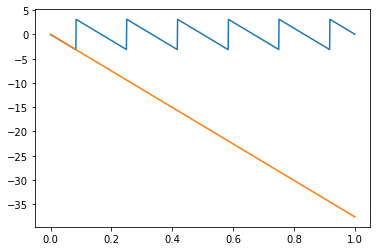

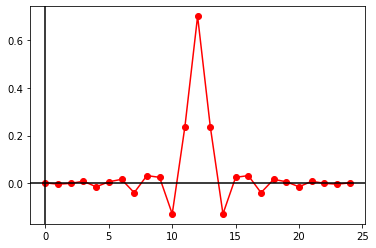

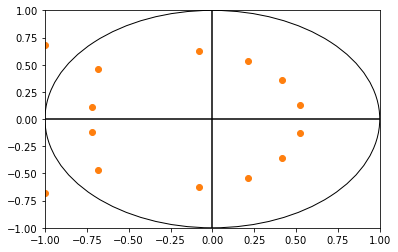

In [17]:
N = 25
w0 = 0.7
M = (N - 1) / 2
n = np.arange(np.floor(-M), np.floor(M) + 1)
h = w0 * np.sinc(w0 * n)


w = signal.windows.triang(N)
plt.title('Triangular window')
build_all(h, w)

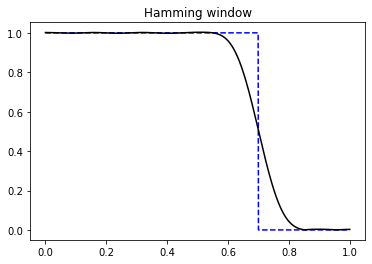

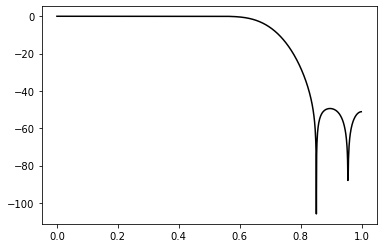

std = 0.11842695992166409


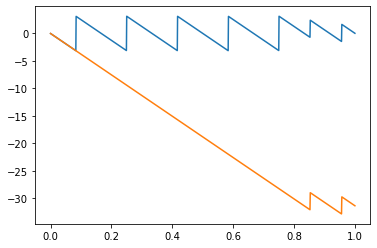

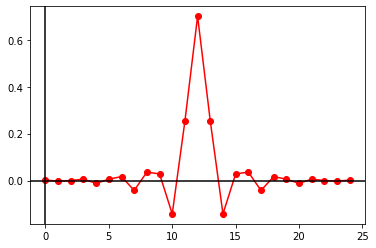

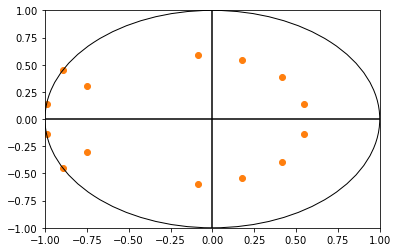

In [18]:
w = signal.windows.hamming(N)
plt.title('Hamming window')
build_all(h, w)

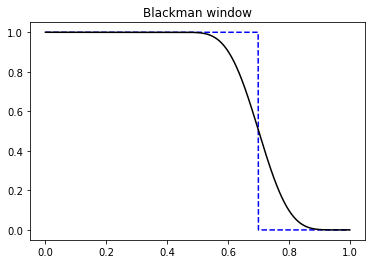

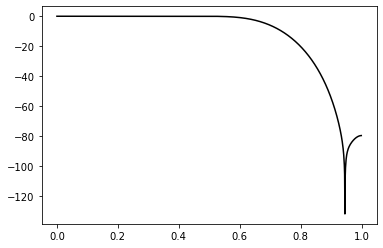

std = 0.13518670857018306


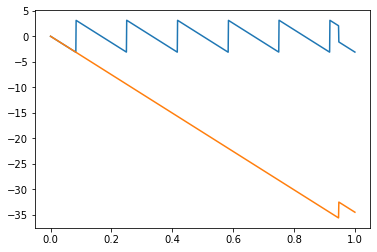

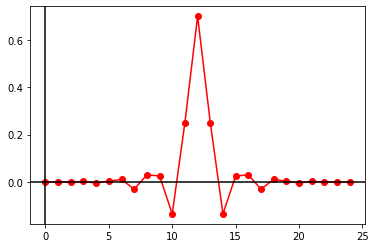

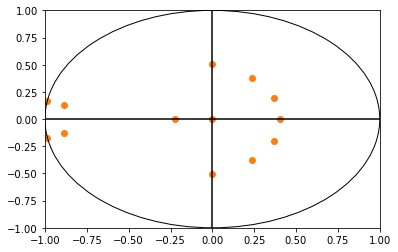

In [19]:
w = signal.windows.blackman(N)
plt.title('Blackman window')
build_all(h, w)

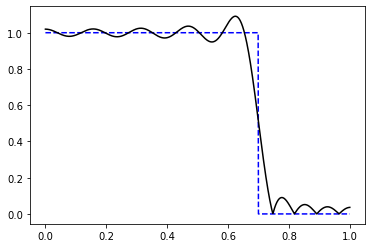

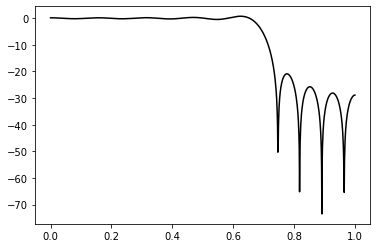

std = 0.08788026521609749


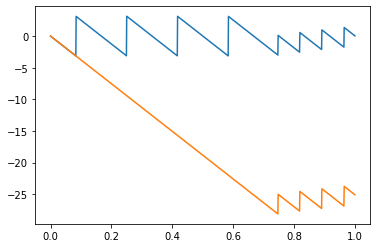

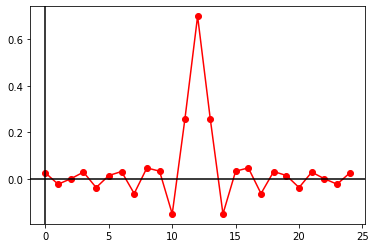

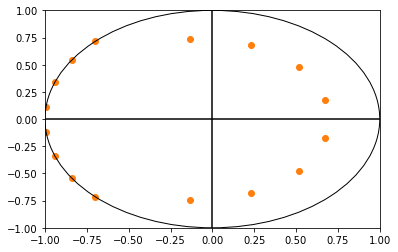

beta_min = 0.07000000000025416
std_min = 0.08788026521609749


In [20]:
N = 25
w0 = 0.7
M = (N - 1) / 2
n = np.arange(np.floor(-M), np.floor(M) + 1)
h = w0 * np.sinc(w0 * n)
beta = 14
beta_min = 0
std_min = 10000
while beta > 0:
    w = signal.windows.kaiser(N, beta=beta)
    h2 = np.multiply(h, np.transpose(w))
    std = std_wind(h2, w, 1024)
    if std < std_min:
        std_min = std
        beta_min = beta
    beta = beta - 0.01

w = signal.windows.kaiser(N, beta=beta_min)
build_all(h, w)
print(f"beta_min = {beta_min}")
print(f"std_min = {std_min}")

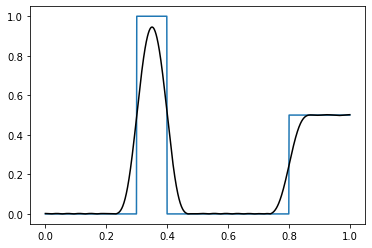

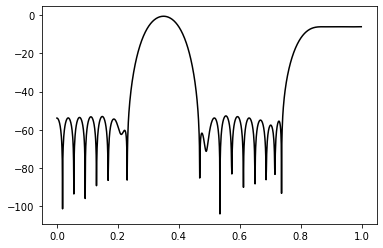

std = 0.7836469777263738


In [21]:
f1 = 0.3
f2 = 0.4
f3 = 0.8
f4 = 1.0
L = 1024

IdealW = np.arange(0, 1, 1/L)
IdealH = np.zeros(L)
IdealH[int(f1*L) : int(f2 * L)] = 1
IdealH[int(f3*L) : int(f4 * L)] = 0.5
plt.plot(IdealW, IdealH)

N = 53
M = (N-1) / 2
n = np.arange(np.floor(-M), np.floor(M) + 1)
h = f2 * np.sinc(f2 * n) - f1* np.sinc(f1 * n)
h2 = f4 * np.sinc(f4 * n) - f3* np.sinc(f3 * n)
h = h + h2 / 2

w = signal.windows.hamming(N)
h = np.multiply(h, np.transpose(w))
afc(h, w, L)